# Corona Virus Data Analysis

In [93]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
sbn.set(rc={'figure.figsize':(11.7,8.27)})


In [95]:
rawData = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
rawData.tail(5)

,date,county,state,fips,cases,deaths
340757,2020-07-16,Sweetwater,Wyoming,56037.0,158,2
340758,2020-07-16,Teton,Wyoming,56039.0,181,1
340759,2020-07-16,Uinta,Wyoming,56041.0,217,0
340760,2020-07-16,Washakie,Wyoming,56043.0,42,5
340761,2020-07-16,Weston,Wyoming,56045.0,3,0


In [96]:
dataFrames = dict(states={}, counties={})
columns = ['cases', 'deaths']

def getTotal(): 
    if not "total" in dataFrames:
        dataFrames["total"] =rawData.groupby('date').sum()[columns]
    return dataFrames["total"]

def getState(state):
    if not state in dataFrames["states"]:
        statedf = rawData[rawData.state==state].groupby('date').sum()[columns]
        if statedf.empty:
            print (state + " is not in the data, did you spell it right? capitalization?")
            return 
        else:
            dataFrames["states"][state] = statedf
    return dataFrames["states"][state]

def getCounty(county):
    if not county in dataFrames["counties"]:
        countydf = rawData[rawData.county==county].groupby('date').sum()[columns]
        if countydf.empty:
            print(county + " is not in the data, did you spell it right? capitalization?")
            return
        else:
            dataFrames["counties"][county] = countydf
    return dataFrames["counties"][county]
        

In [97]:
yesterday, today = getTotal().tail(2).index.values # last two dates data to check how recent this data is
print("Latest date: ", today)

Latest date:  2020-07-16


In [98]:

yesterdayLatest = rawData[rawData.date == yesterday].groupby(['state', 'county']).sum()[columns]
latest = rawData[rawData.date == today].groupby(['state', 'county']).sum()[columns]
deltas = latest - yesterdayLatest
latest["newcases"] = deltas.cases
latest["newdeaths"] = deltas.deaths
latest = latest.reset_index()

In [99]:
timeseries = rawData.groupby(['state', 'county', 'date']).sum()[columns]
timeseries[['newcases', 'newdeaths']]= timeseries.groupby(['state', 'county']).diff()
# timeseries= timeseries.reset_index(drop=True)

In [100]:
timeseries.loc['California', "Los Angeles"].sort_index(ascending=False).head(20)

,cases,deaths,newcases,newdeaths
date,,,,
2020-07-16,147468,3988,4459.0,52.0
2020-07-15,143009,3936,2702.0,42.0
2020-07-14,140307,3894,4178.0,72.0
2020-07-13,136129,3822,2580.0,13.0
2020-07-12,133549,3809,3307.0,16.0
2020-07-11,130242,3793,2884.0,55.0
2020-07-10,127358,3738,2620.0,49.0
2020-07-09,124738,3689,1734.0,47.0
2020-07-08,123004,3642,2465.0,63.0


In [101]:
timeseries.loc['New York', 'New York City'].sort_index(ascending=False).head(20)
# worstPlaces("New York")

,cases,deaths,newcases,newdeaths
date,,,,
2020-07-16,225045,22842,383.0,17.0
2020-07-15,224662,22825,369.0,17.0
2020-07-14,224293,22808,316.0,13.0
2020-07-13,223977,22795,252.0,40.0
2020-07-12,223725,22755,343.0,5.0
2020-07-11,223382,22750,304.0,11.0
2020-07-10,223078,22739,355.0,20.0
2020-07-09,222723,22719,279.0,23.0
2020-07-08,222444,22696,288.0,6.0


In [102]:
timeseries.loc['Arizona', "Maricopa"].sort_index(ascending=False).head(20)

,cases,deaths,newcases,newdeaths
date,,,,
2020-07-16,88954,1311,2471.0,34.0
2020-07-15,86483,1277,2250.0,79.0
2020-07-14,84233,1198,3017.0,58.0
2020-07-13,81216,1140,1070.0,7.0
2020-07-12,80146,1133,1665.0,40.0
2020-07-11,78481,1093,2153.0,44.0
2020-07-10,76328,1049,3163.0,37.0
2020-07-09,73165,1012,3037.0,53.0
2020-07-08,70128,959,2585.0,26.0


In [103]:
timeseries.loc['California', "San Francisco"].sort_index(ascending=False).head(20)

,cases,deaths,newcases,newdeaths
date,,,,
2020-07-16,4863,51,164.0,1.0
2020-07-15,4699,50,56.0,0.0
2020-07-14,4643,50,50.0,0.0
2020-07-13,4593,50,68.0,0.0
2020-07-12,4525,50,96.0,0.0
2020-07-11,4429,50,110.0,0.0
2020-07-10,4319,50,171.0,0.0
2020-07-09,4148,50,74.0,0.0
2020-07-08,4074,50,51.0,0.0


In [104]:
def worstPlaces(state=None, count=30):
    if state == None:
        count = 30
        print(f"Counties with the most new cases in US for {today}:")
        display(latest.sort_values(['newcases', 'newdeaths'], ascending=False)[:count].reset_index(drop=True))
        print(f"Counties with the most new deaths in US for {today}:")
        display(latest.sort_values(['newdeaths', 'newcases'], ascending=False)[:count].reset_index(drop=True))
    else:
        print(f"Counties with the most new cases in {state} for {today}:")
        display(latest[latest.state==state].sort_values(['newcases', 'newdeaths'], ascending=False)[:count].reset_index(drop=True))
        print(f"Counties with the most new deaths in {state} for {today}:")
        display(latest[latest.state==state].sort_values(['newdeaths', 'newcases'], ascending=False)[:count].reset_index(drop=True))


In [105]:
worstPlaces()

Counties with the most new cases in US for 2020-07-16:


,state,county,cases,deaths,newcases,newdeaths
0,Texas,Bexar,27059,229,5501.0,21.0
1,California,Los Angeles,147468,3988,4459.0,52.0
2,Florida,Miami-Dade,75424,1246,3108.0,44.0
3,Arizona,Maricopa,88954,1311,2471.0,34.0
4,Texas,Harris,51969,509,1599.0,18.0
5,Florida,Broward,35566,464,1413.0,0.0
6,Florida,Orange,21298,101,1390.0,8.0
7,Nevada,Clark,26926,507,1315.0,5.0
8,Texas,Hidalgo,10433,240,1247.0,22.0
9,Texas,Dallas,36969,485,1055.0,8.0


Counties with the most new deaths in US for 2020-07-16:


,state,county,cases,deaths,newcases,newdeaths
0,California,Los Angeles,147468,3988,4459.0,52.0
1,Florida,Miami-Dade,75424,1246,3108.0,44.0
2,Florida,Hillsborough,21557,232,539.0,40.0
3,Arizona,Maricopa,88954,1311,2471.0,34.0
4,Texas,Hidalgo,10433,240,1247.0,22.0
5,Texas,Bexar,27059,229,5501.0,21.0
6,Texas,Harris,51969,509,1599.0,18.0
7,California,San Diego,21918,465,409.0,17.0
8,New York,New York City,225045,22842,383.0,17.0
9,Florida,Pinellas,12368,295,288.0,17.0


In [106]:
worstPlaces("California")

Counties with the most new cases in California for 2020-07-16:


,state,county,cases,deaths,newcases,newdeaths
0,California,Los Angeles,147468,3988,4459.0,52.0
1,California,Orange,27904,466,873.0,11.0
2,California,Riverside,28492,585,642.0,8.0
3,California,San Diego,21918,465,409.0,17.0
4,California,San Joaquin,7680,81,252.0,8.0
5,California,Sacramento,6394,94,221.0,2.0
6,California,Fresno,9124,91,183.0,0.0
7,California,Kern,7155,105,176.0,7.0
8,California,Imperial,8310,147,165.0,0.0
9,California,San Francisco,4863,51,164.0,1.0


Counties with the most new deaths in California for 2020-07-16:


,state,county,cases,deaths,newcases,newdeaths
0,California,Los Angeles,147468,3988,4459.0,52.0
1,California,San Diego,21918,465,409.0,17.0
2,California,Orange,27904,466,873.0,11.0
3,California,Riverside,28492,585,642.0,8.0
4,California,San Joaquin,7680,81,252.0,8.0
5,California,Tulare,6480,161,148.0,8.0
6,California,Kern,7155,105,176.0,7.0
7,California,Santa Clara,7046,177,95.0,3.0
8,California,Sacramento,6394,94,221.0,2.0
9,California,San Francisco,4863,51,164.0,1.0


In [107]:
worstPlaces("Colorado")

Counties with the most new cases in Colorado for 2020-07-16:


,state,county,cases,deaths,newcases,newdeaths
0,Colorado,El Paso,3370,119,83.0,0.0
1,Colorado,Denver,8164,398,66.0,1.0
2,Colorado,Arapahoe,5854,351,65.0,-1.0
3,Colorado,Adams,4972,159,56.0,0.0
4,Colorado,Jefferson,3174,217,56.0,0.0
5,Colorado,Weld,3155,139,50.0,1.0
6,Colorado,Douglas,1263,54,39.0,0.0
7,Colorado,Larimer,1009,30,27.0,0.0
8,Colorado,Boulder,1618,74,23.0,0.0
9,Colorado,Fremont,68,0,21.0,0.0


Counties with the most new deaths in Colorado for 2020-07-16:


,state,county,cases,deaths,newcases,newdeaths
0,Colorado,Denver,8164,398,66.0,1.0
1,Colorado,Weld,3155,139,50.0,1.0
2,Colorado,El Paso,3370,119,83.0,0.0
3,Colorado,Adams,4972,159,56.0,0.0
4,Colorado,Jefferson,3174,217,56.0,0.0
5,Colorado,Douglas,1263,54,39.0,0.0
6,Colorado,Larimer,1009,30,27.0,0.0
7,Colorado,Boulder,1618,74,23.0,0.0
8,Colorado,Fremont,68,0,21.0,0.0
9,Colorado,Garfield,469,4,21.0,0.0


In [108]:
worstPlaces("Arizona")

Counties with the most new cases in Arizona for 2020-07-16:


,state,county,cases,deaths,newcases,newdeaths
0,Arizona,Maricopa,88954,1311,2471.0,34.0
1,Arizona,Pima,12697,360,291.0,13.0
2,Arizona,Pinal,6243,93,125.0,3.0
3,Arizona,Yuma,8955,172,101.0,7.0
4,Arizona,Navajo,4598,147,69.0,1.0
5,Arizona,Coconino,2581,105,49.0,3.0
6,Arizona,Yavapai,1283,23,39.0,0.0
7,Arizona,Cochise,1161,27,30.0,0.0
8,Arizona,Santa Cruz,2251,33,25.0,0.0
9,Arizona,Mohave,2108,102,24.0,3.0


Counties with the most new deaths in Arizona for 2020-07-16:


,state,county,cases,deaths,newcases,newdeaths
0,Arizona,Maricopa,88954,1311,2471.0,34.0
1,Arizona,Pima,12697,360,291.0,13.0
2,Arizona,Yuma,8955,172,101.0,7.0
3,Arizona,Pinal,6243,93,125.0,3.0
4,Arizona,Coconino,2581,105,49.0,3.0
5,Arizona,Mohave,2108,102,24.0,3.0
6,Arizona,Navajo,4598,147,69.0,1.0
7,Arizona,Yavapai,1283,23,39.0,0.0
8,Arizona,Cochise,1161,27,30.0,0.0
9,Arizona,Santa Cruz,2251,33,25.0,0.0


In [109]:
def fitExponential(series):
    series = series.dropna()
    series = series[series>0]
    logseries = np.log(series)
    n = len(logseries)
    rate, intercept = np.polyfit(np.arange(n), logseries, 1) 
    base = np.exp(intercept)
    return (rate, base, n) 


In [110]:
def plotFitted(series, name, log=True): 
    (rate, base, n) = fitExponential(series)
    x = np.arange(n)
    series = series[-n:]
    if log:
        plt.semilogy()
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    sbn.scatterplot(x, series, label=f"{name} actual")
    sbn.lineplot(x, base * np.exp(rate*x) , label=f"{name} expected with constant exponential growth")
    plt.show()

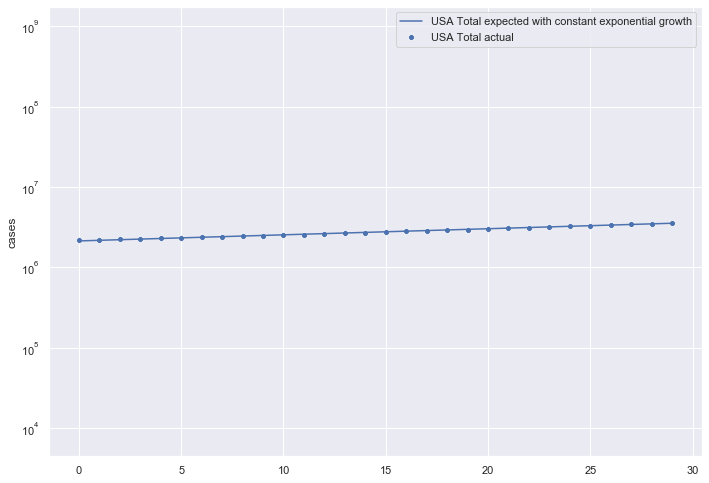

In [111]:
plotFitted(getTotal()["cases"][-30:], "USA Total")

In [112]:
def growthRateAnalysis(series, name, n=30):
    rate, base, n = fitExponential(series[-n:])
    name = f"{name} {series.name}"
    formula = f"{series.name} = {np.round(base, 2)} * exp({np.round(rate, 4)} * day)"
    dailyGrowth = np.round(100 * (np.exp(rate) - 1), 2)
    daysToDoubling = np.round(np.log(2)/rate, 2)
    print(f"{name} exponential formula fitted with {n} points:")
    print(formula)
    print(f"fitted daily growth rate: {dailyGrowth} %, fitted days to doubling: {daysToDoubling}")
    deltas = series.diff(1)
    rates = 100*deltas/series
    data = {
        f"{name} day to day growth rate (%)":rates, 
        f"{name} 3 day moving average":rates.rolling(window=3).mean(), 
        f"{name} 5 day moving average":rates.rolling(window=5).mean(), 
    }
    df = pd.DataFrame(data).dropna()[-n:]
    gr = df.tail(1)[f"{name} 5 day moving average"].values[0]
    dailyGrowth = np.round(gr, 2)
    daysToDoubling = np.round(np.log(2)*100/gr, 2)
    print(f"actual daily growth rate: {dailyGrowth} %, actual days to doubling: {daysToDoubling}")    
    sbn.lineplot(data=df)
    plt.show()
    plotFitted(series[-n:], name)


Total USA cases exponential formula fitted with 30 points:
cases = 2135027.1 * exp(0.0175 * day)
fitted daily growth rate: 1.76 %, fitted days to doubling: 39.68
actual daily growth rate: 1.89 %, actual days to doubling: 36.6


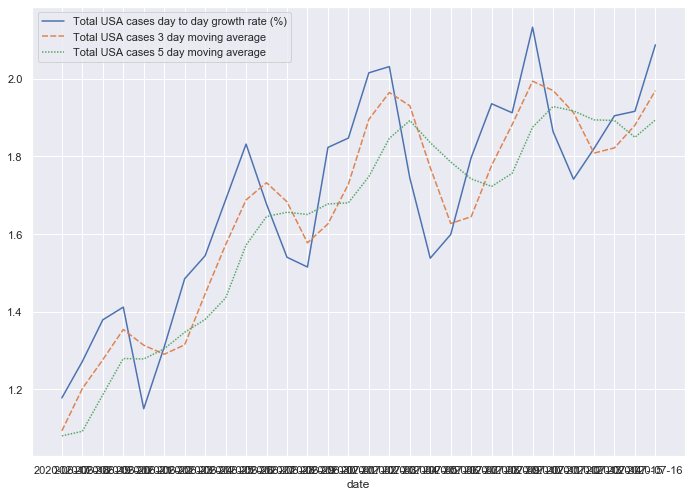

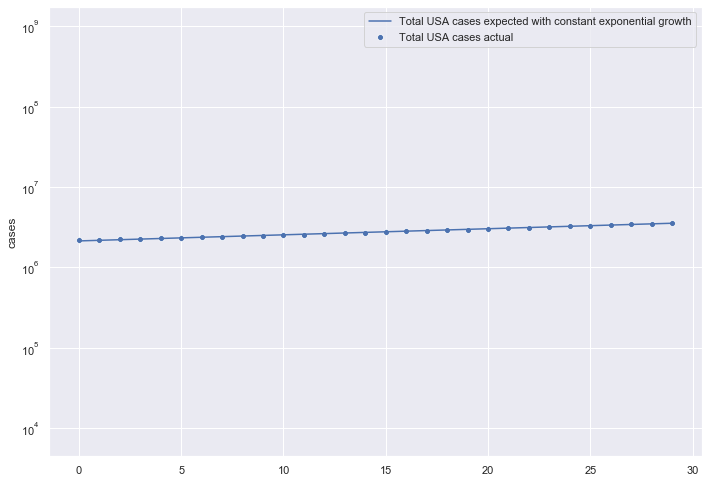

In [113]:
growthRateAnalysis(getTotal()['cases'], "Total USA")

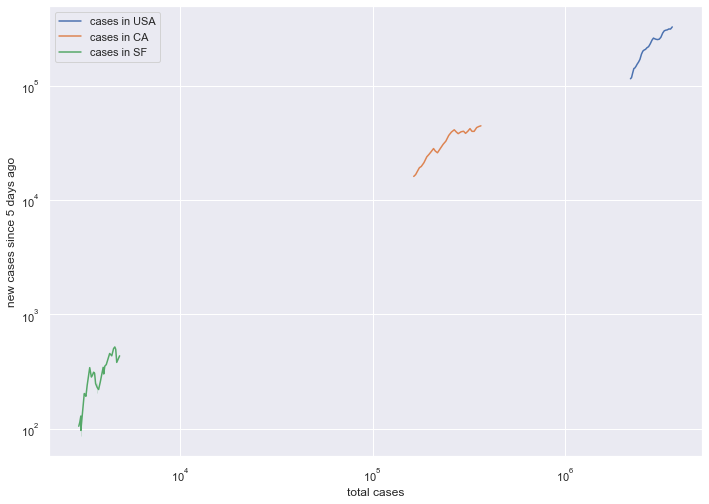

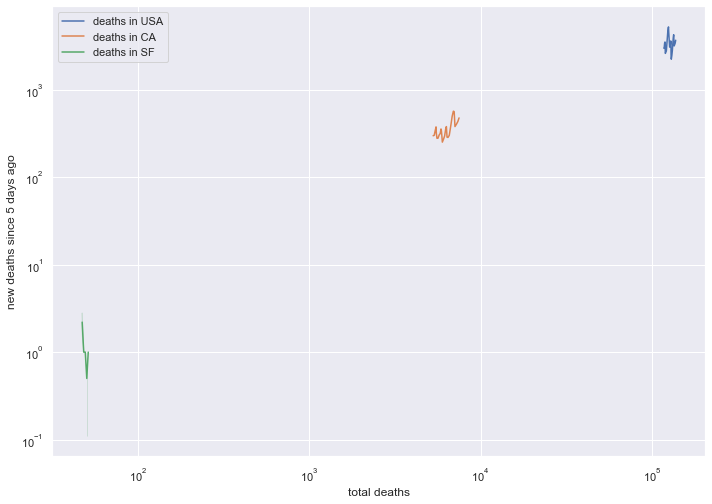

In [114]:
def trajectoryPlot(series, name):
    deltas = series.diff(5)
    fullname = f"{series.name} in {name}"
    x = f"total {series.name}"
    y = f"new {series.name} since 5 days ago"
    data = {x: series, y: deltas}
    plt.loglog()
    df = pd.DataFrame(data).dropna()[-30:]
    sbn.lineplot(x, y, data=df, label=fullname)
    
trajectoryPlot(getTotal()['cases'], "USA")
trajectoryPlot(getState("California")['cases'], "CA")
trajectoryPlot(getCounty("San Francisco")["cases"], "SF")
plt.show()
trajectoryPlot(getTotal()['deaths'], "USA")
trajectoryPlot(getState("California")['deaths'], "CA")
trajectoryPlot(getCounty("San Francisco")["deaths"], "SF")
plt.show()

In [115]:
def laggedPlot(df, name):
    vals = df.copy()
    vals = df.dropna()[df.cases > 0]
    # show correlation with wide range of time lags
    for i in range(30):
        vals[i] = df.cases.shift(i)
    vals = vals.drop(columns='cases')
    vals = vals[vals.deaths > 0][-20:]
    corrs = vals.corr()[['deaths']].drop('deaths')
    lc = np.log(vals).corr()[['deaths']].drop('deaths')
    lc[0] = lc.deaths
    for i in [3, 5, 7]:
        lc[i] = lc.deaths.rolling(i).mean()
    lc = lc.dropna()
    corrdata = {
        f"{name} correlation of log of deaths to log of cases by # of days ago": lc[0],
        f"{name} correlation 3 day moving average": lc[3],
        f"{name} correlation 5 day moving average": lc[5],
        f"{name} correlation 7 day moving average": lc[7],
    }
    corrsdf = pd.DataFrame(corrdata)
    print(f"Correlations for {name}:")
    sbn.lineplot(data=corrsdf)
    plt.show()
    # dig deeper into an interesting set of time lags
    values = vals[["deaths"]].copy()
    ratios = vals[["deaths"]].copy()
    interesting = [7, 14]
    for i in [0, 3, 5, 7]:
        l = lc[i].dropna()
        lmax = l[l==max(l)] # max at this correlation moving average
        interesting += list(lmax.index)
    for i in sorted(list(set(interesting))):
        values[f"{name} cases {i} days ago"] = vals[i]
        ratios[f"{name} deaths/cases {i} days ago"] = vals.deaths/vals[i]
    ratios = ratios.drop(columns=['deaths'])
    print(f"Deaths vs Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=values, dashes=False)
    plt.show()
    print(f"Deaths / Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=ratios, dashes=False)
    plt.show()

    

In [116]:
# laggedPlot(getTotal(), "USA")
# laggedPlot(getState("California"), "CA")
# laggedPlot(getCounty("San Francisco"), "SF")

In [117]:
def analyse(counties=[], states=[], n=20):
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    names = counties + states + ["USA total:"]
    rates= []
    dfs = [getCounty(c) for c in counties] + [getState(s) for s in states] + [getTotal()] 
    print("Trajectory Plots to see if the curve is flattening:")
    for col in ["cases", "deaths"]:
        for df, name in zip(dfs, names):
            trajectoryPlot(df[col], name)
        plt.show()
    for df, name in zip(dfs, names):
        print(f"\n### Analysis for {name:} ###\n")
        growthRateAnalysis(df["cases"], name)
        growthRateAnalysis(df["deaths"], name)
        print(f"Trajectory plots for {name}, to see when the curve starts flattening")
        trajectoryPlot(df.cases, name)
        trajectoryPlot(df.deaths, name)
        plt.show()
#         laggedPlot(df, name)


        
    
    

Trajectory Plots to see if the curve is flattening:


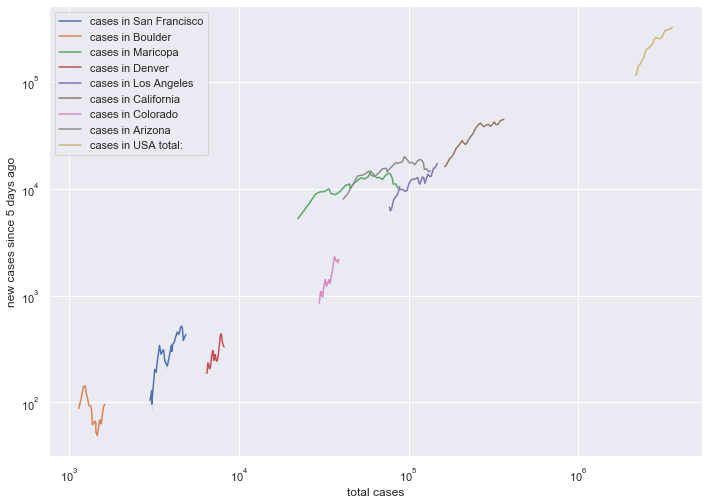

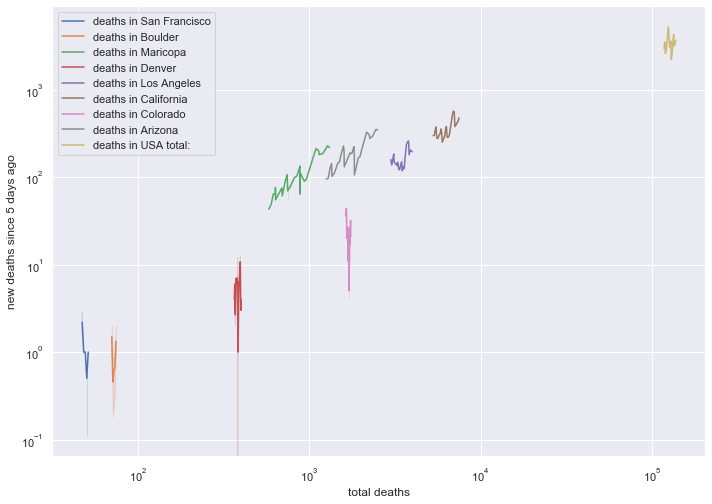


### Analysis for San Francisco ###

San Francisco cases exponential formula fitted with 30 points:
cases = 2911.47 * exp(0.0169 * day)
fitted daily growth rate: 1.7 %, fitted days to doubling: 41.09
actual daily growth rate: 1.85 %, actual days to doubling: 37.5


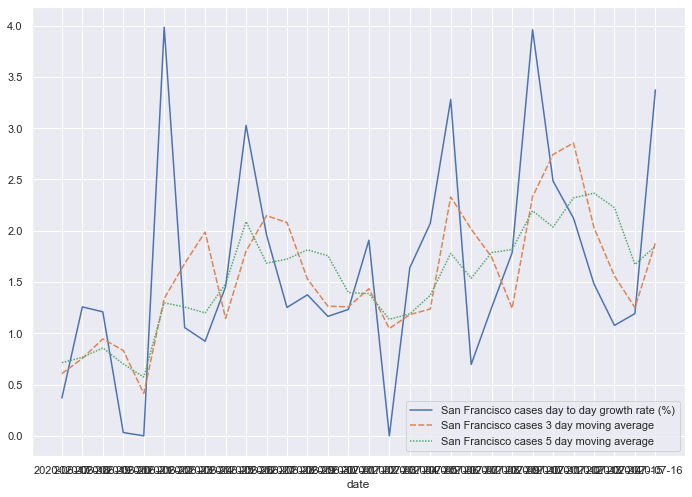

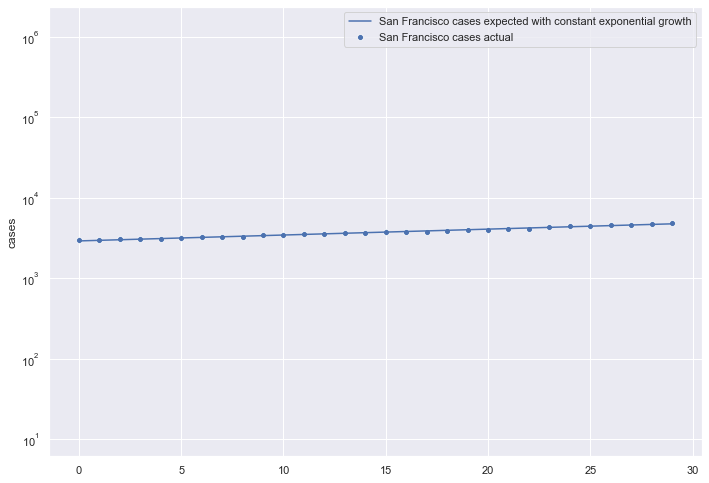

San Francisco deaths exponential formula fitted with 30 points:
deaths = 47.35 * exp(0.0026 * day)
fitted daily growth rate: 0.26 %, fitted days to doubling: 269.71
actual daily growth rate: 0.39 %, actual days to doubling: 176.75


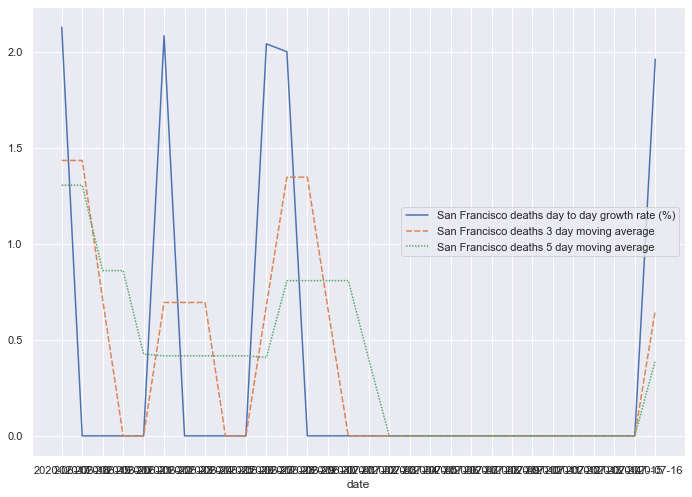

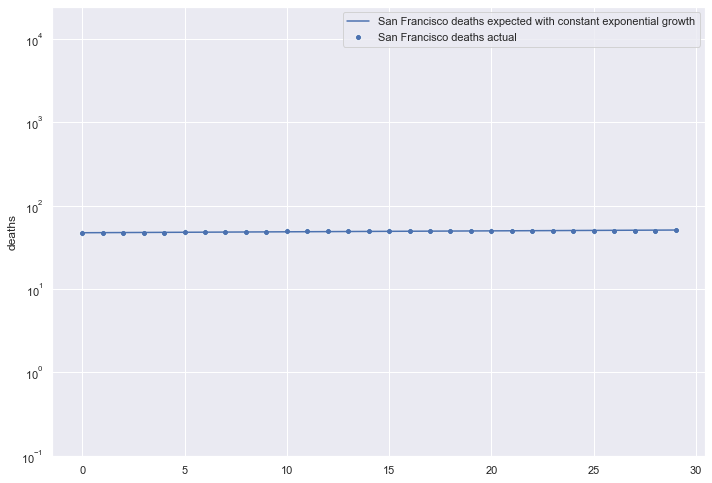

Trajectory plots for San Francisco, to see when the curve starts flattening


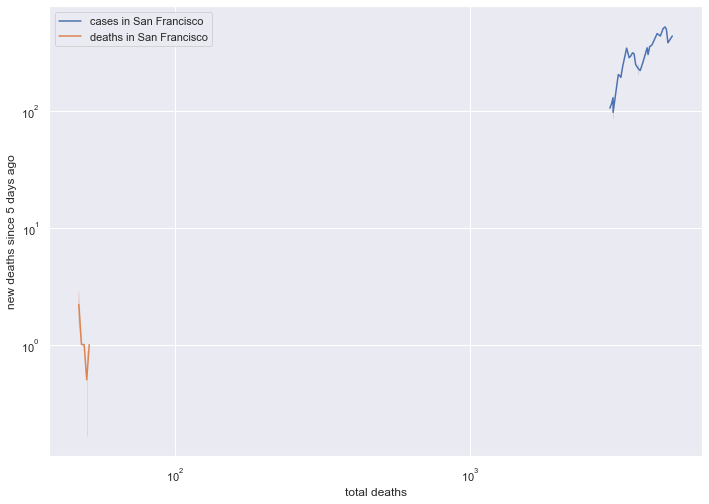


### Analysis for Boulder ###

Boulder cases exponential formula fitted with 30 points:
cases = 1193.98 * exp(0.0104 * day)
fitted daily growth rate: 1.05 %, fitted days to doubling: 66.6
actual daily growth rate: 1.21 %, actual days to doubling: 57.08


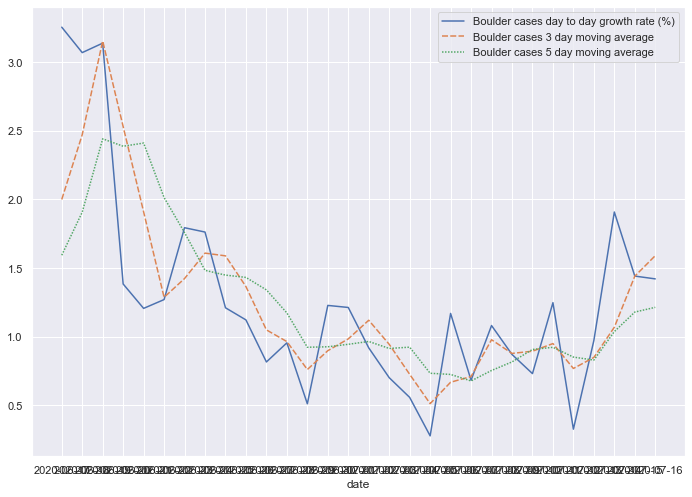

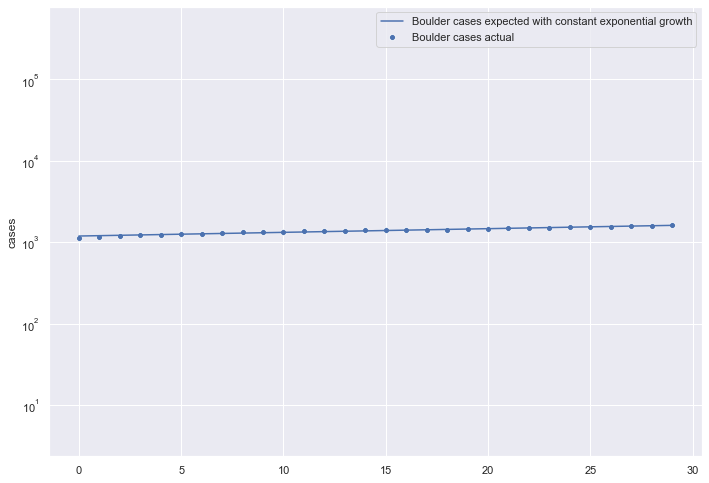

Boulder deaths exponential formula fitted with 30 points:
deaths = 70.16 * exp(0.0017 * day)
fitted daily growth rate: 0.17 %, fitted days to doubling: 413.27
actual daily growth rate: 0.27 %, actual days to doubling: 256.46


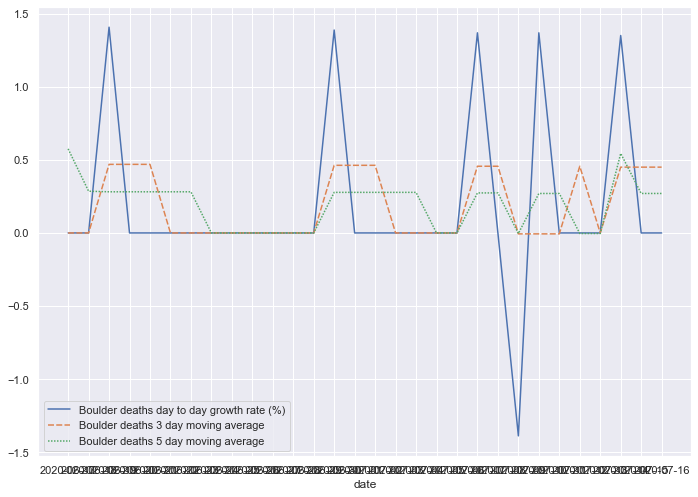

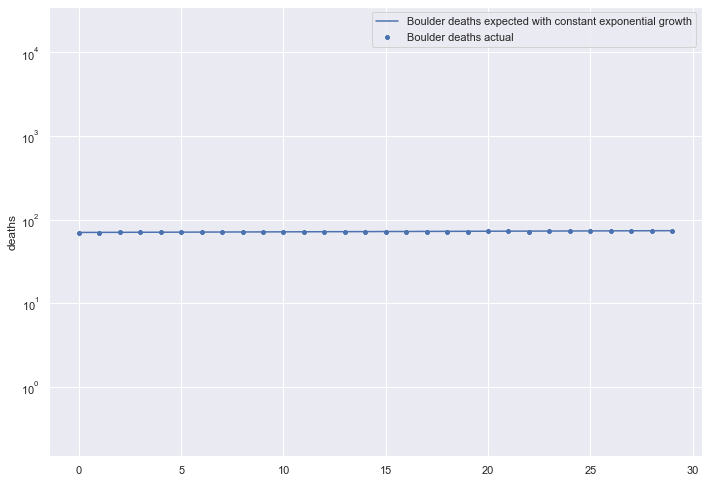

Trajectory plots for Boulder, to see when the curve starts flattening


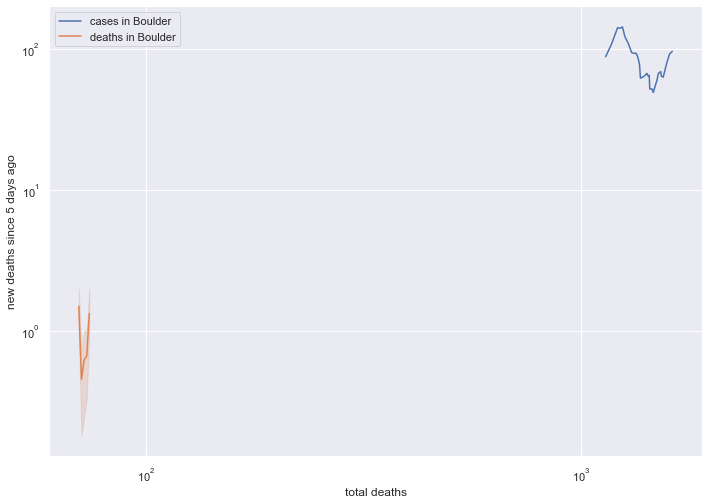


### Analysis for Maricopa ###

Maricopa cases exponential formula fitted with 30 points:
cases = 25142.97 * exp(0.0475 * day)
fitted daily growth rate: 4.86 %, fitted days to doubling: 14.6
actual daily growth rate: 2.47 %, actual days to doubling: 28.05


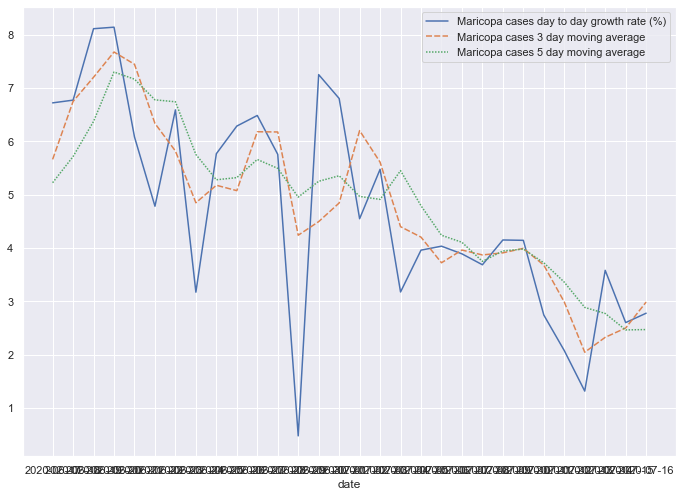

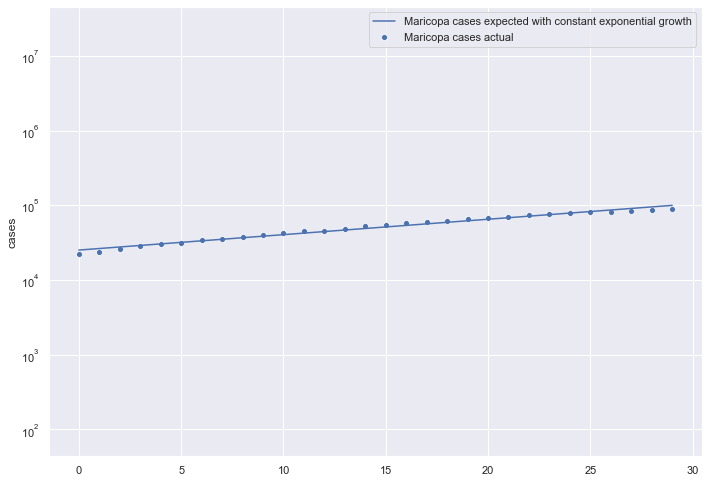

Maricopa deaths exponential formula fitted with 30 points:
deaths = 563.37 * exp(0.027 * day)
fitted daily growth rate: 2.74 %, fitted days to doubling: 25.63
actual daily growth rate: 3.55 %, actual days to doubling: 19.51


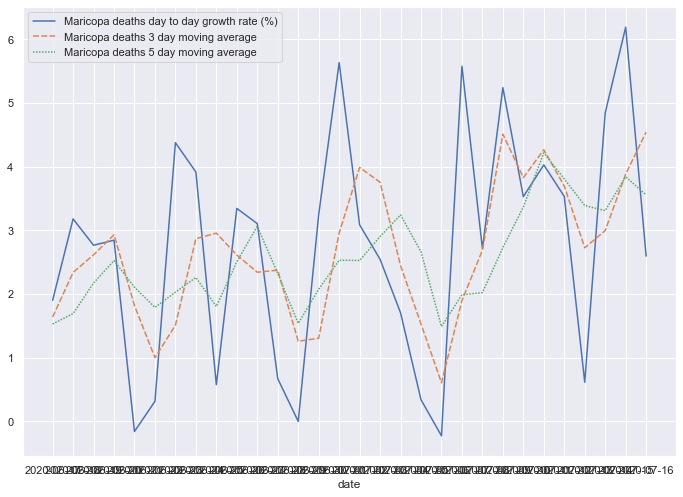

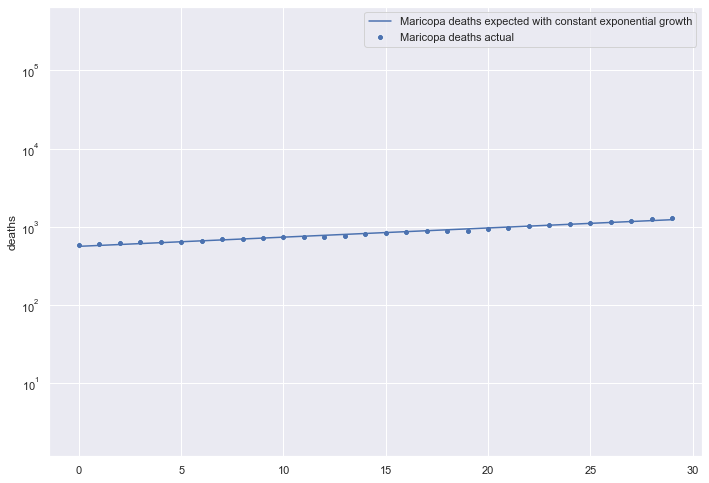

Trajectory plots for Maricopa, to see when the curve starts flattening


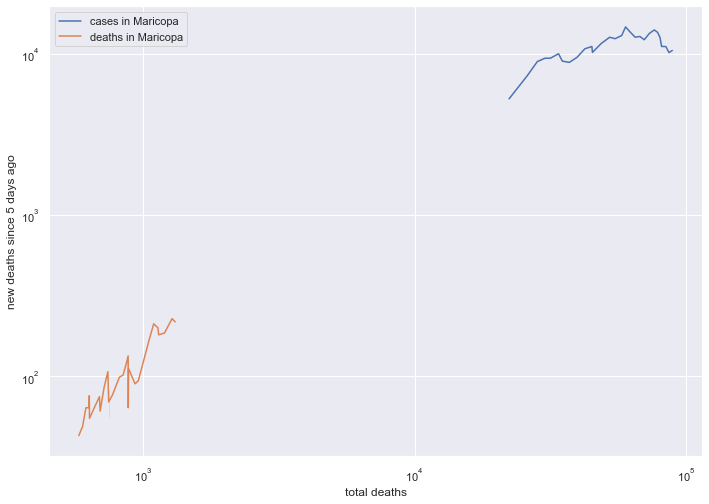


### Analysis for Denver ###

Denver cases exponential formula fitted with 30 points:
cases = 6409.24 * exp(0.0081 * day)
fitted daily growth rate: 0.82 %, fitted days to doubling: 85.36
actual daily growth rate: 0.83 %, actual days to doubling: 83.84


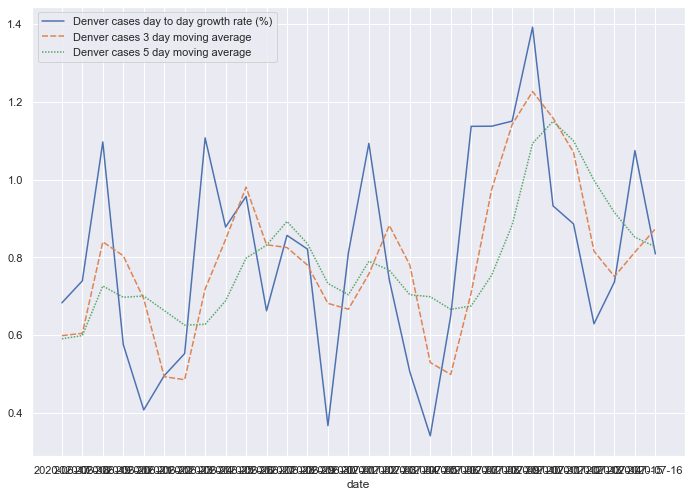

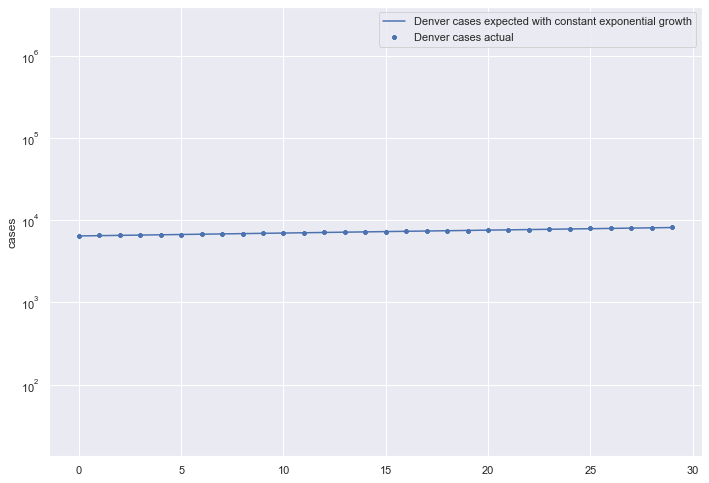

Denver deaths exponential formula fitted with 30 points:
deaths = 362.69 * exp(0.0032 * day)
fitted daily growth rate: 0.32 %, fitted days to doubling: 219.1
actual daily growth rate: 0.2 %, actual days to doubling: 343.76


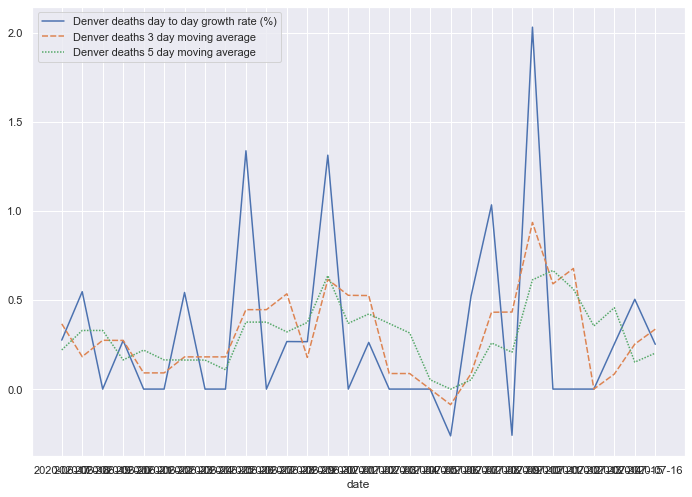

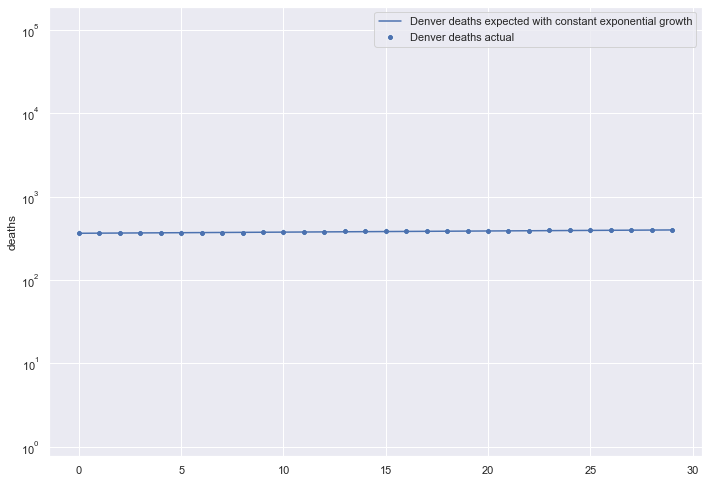

Trajectory plots for Denver, to see when the curve starts flattening


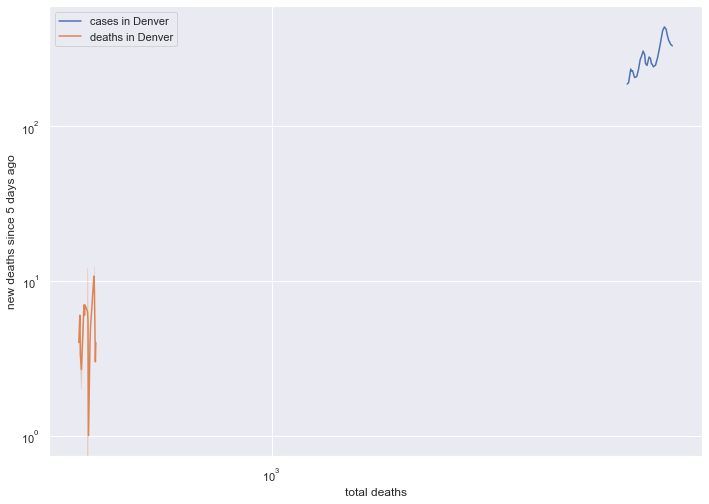


### Analysis for Los Angeles ###

Los Angeles cases exponential formula fitted with 30 points:
cases = 76699.99 * exp(0.0223 * day)
fitted daily growth rate: 2.26 %, fitted days to doubling: 31.03
actual daily growth rate: 2.45 %, actual days to doubling: 28.26


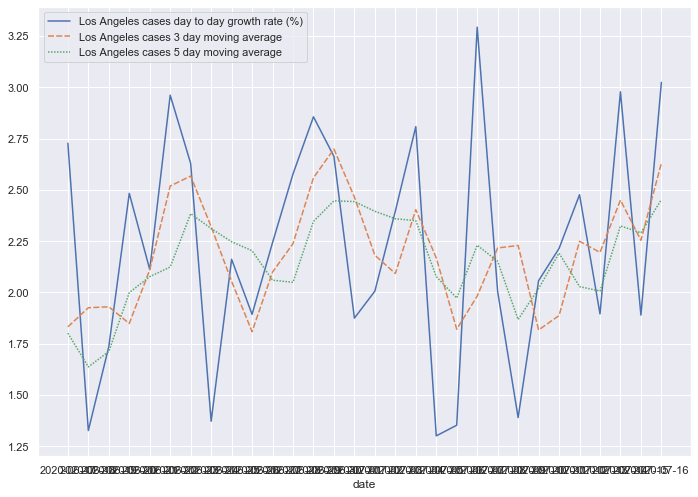

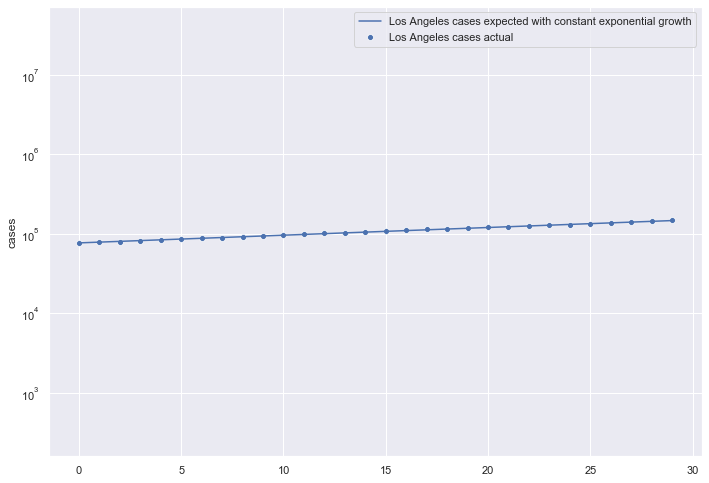

Los Angeles deaths exponential formula fitted with 30 points:
deaths = 2990.01 * exp(0.0095 * day)
fitted daily growth rate: 0.95 %, fitted days to doubling: 72.98
actual daily growth rate: 1.0 %, actual days to doubling: 69.59


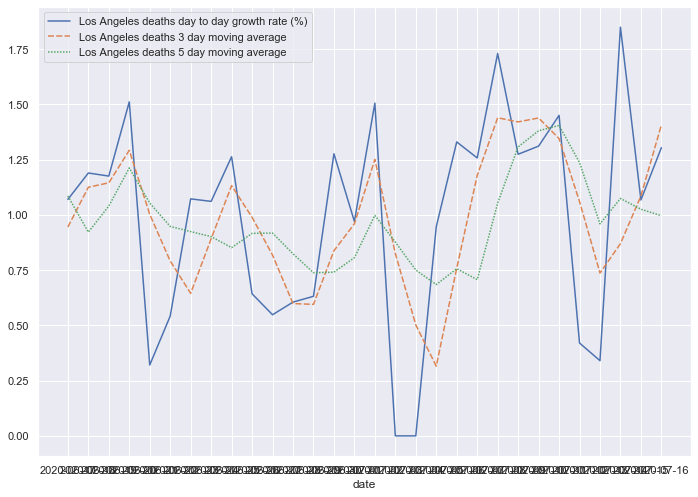

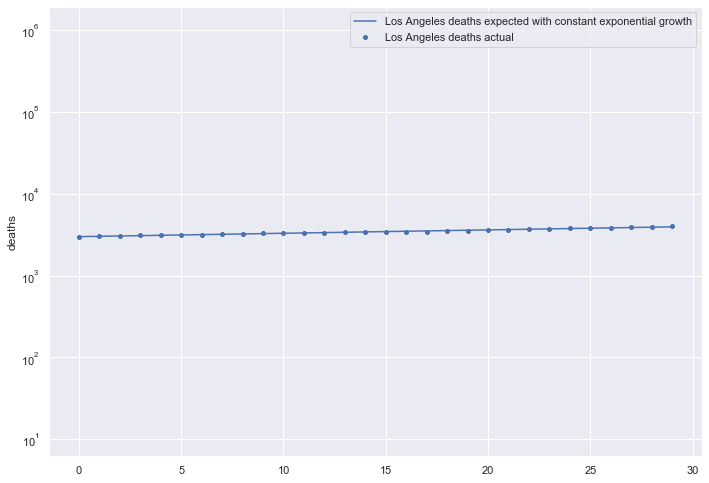

Trajectory plots for Los Angeles, to see when the curve starts flattening


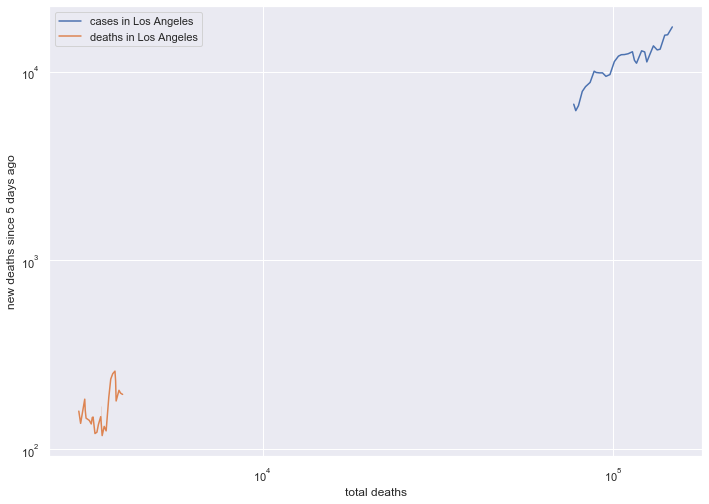


### Analysis for California ###

California cases exponential formula fitted with 30 points:
cases = 160946.24 * exp(0.0285 * day)
fitted daily growth rate: 2.89 %, fitted days to doubling: 24.29
actual daily growth rate: 2.58 %, actual days to doubling: 26.91


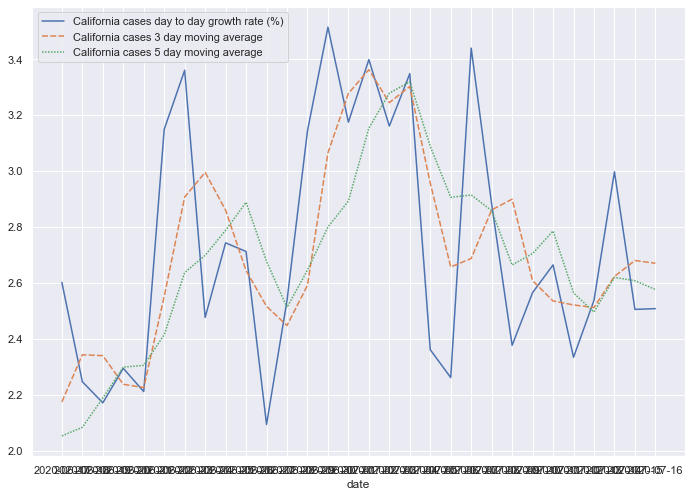

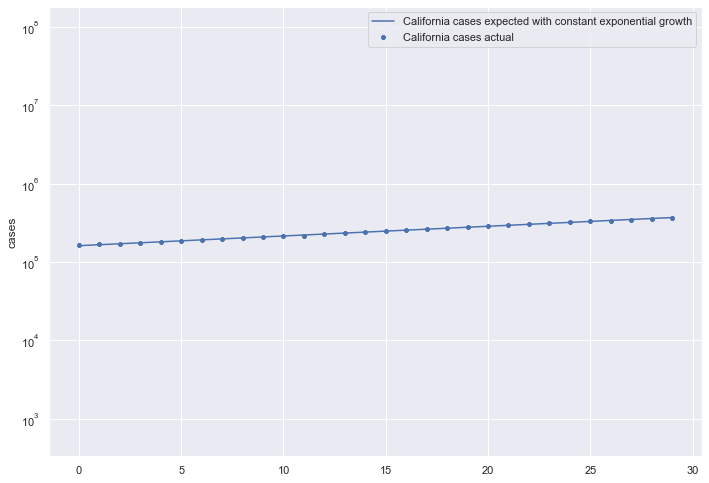

California deaths exponential formula fitted with 30 points:
deaths = 5261.04 * exp(0.0116 * day)
fitted daily growth rate: 1.17 %, fitted days to doubling: 59.68
actual daily growth rate: 1.3 %, actual days to doubling: 53.31


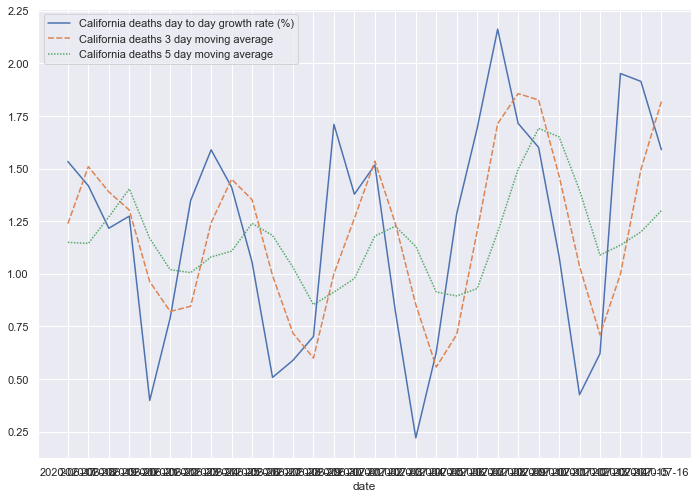

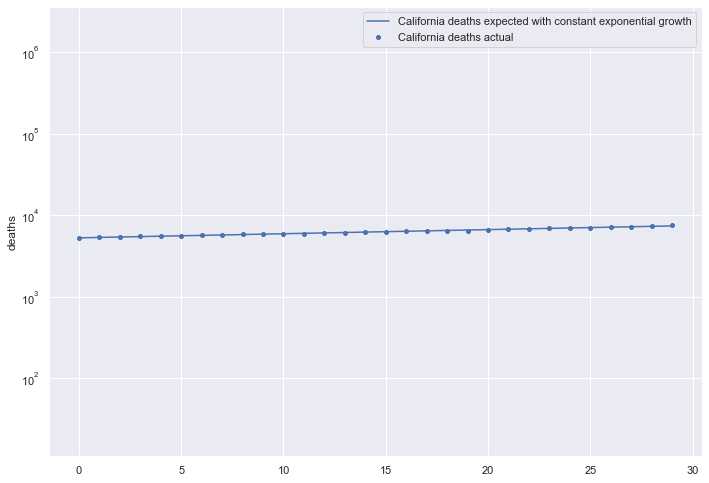

Trajectory plots for California, to see when the curve starts flattening


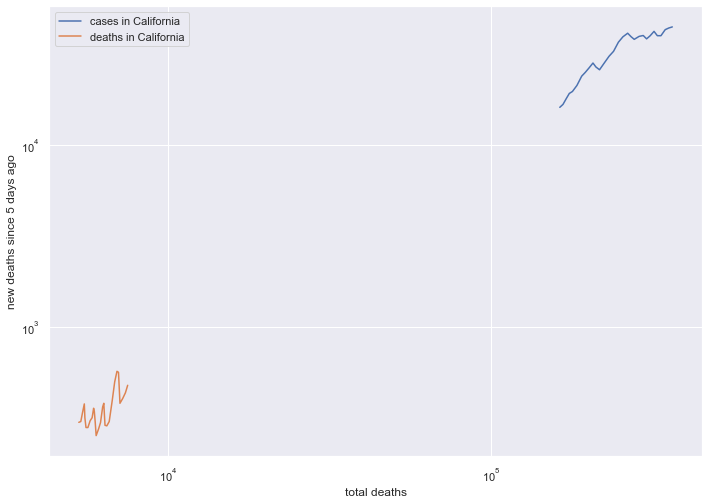


### Analysis for Colorado ###

Colorado cases exponential formula fitted with 30 points:
cases = 29311.61 * exp(0.009 * day)
fitted daily growth rate: 0.91 %, fitted days to doubling: 76.65
actual daily growth rate: 1.15 %, actual days to doubling: 60.21


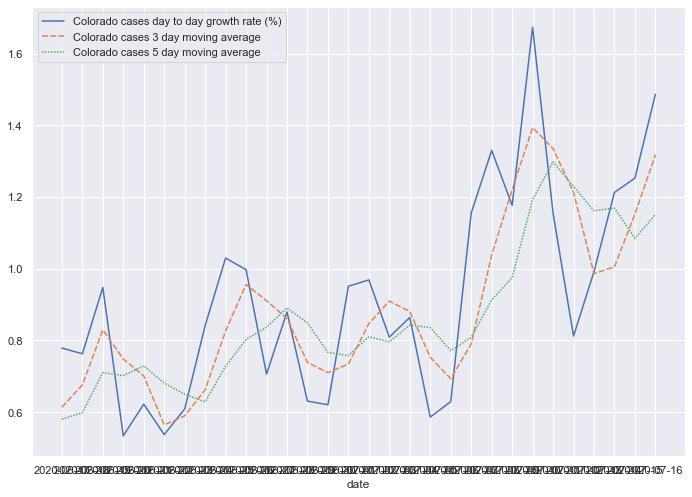

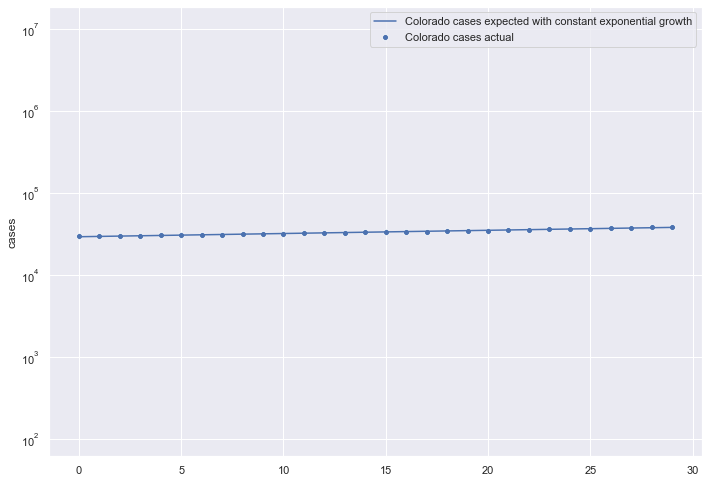

Colorado deaths exponential formula fitted with 30 points:
deaths = 1637.4 * exp(0.0022 * day)
fitted daily growth rate: 0.22 %, fitted days to doubling: 316.14
actual daily growth rate: 0.24 %, actual days to doubling: 287.06


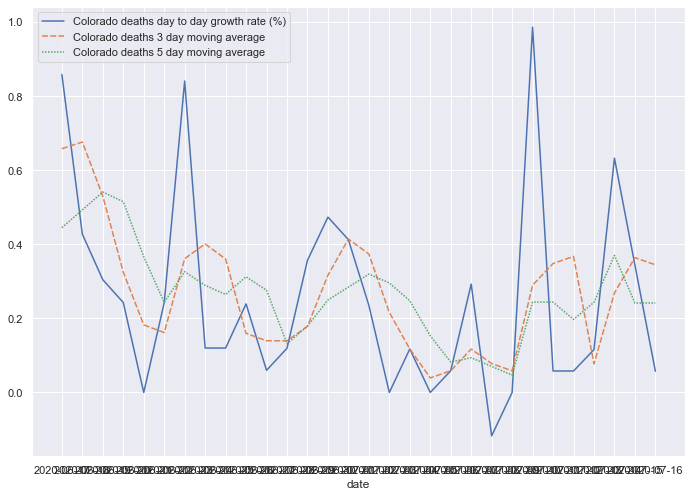

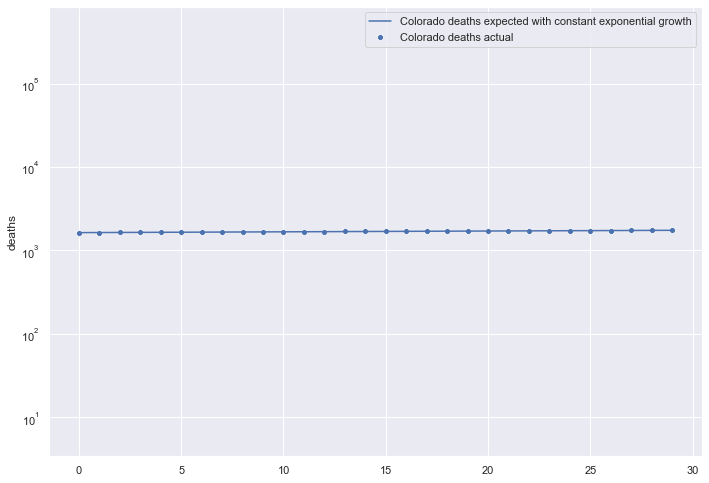

Trajectory plots for Colorado, to see when the curve starts flattening


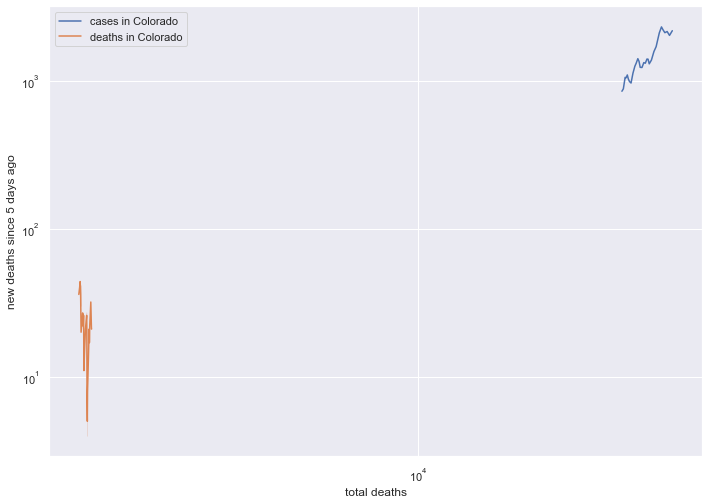


### Analysis for Arizona ###

Arizona cases exponential formula fitted with 30 points:
cases = 45221.92 * exp(0.0407 * day)
fitted daily growth rate: 4.15 %, fitted days to doubling: 17.04
actual daily growth rate: 2.28 %, actual days to doubling: 30.41


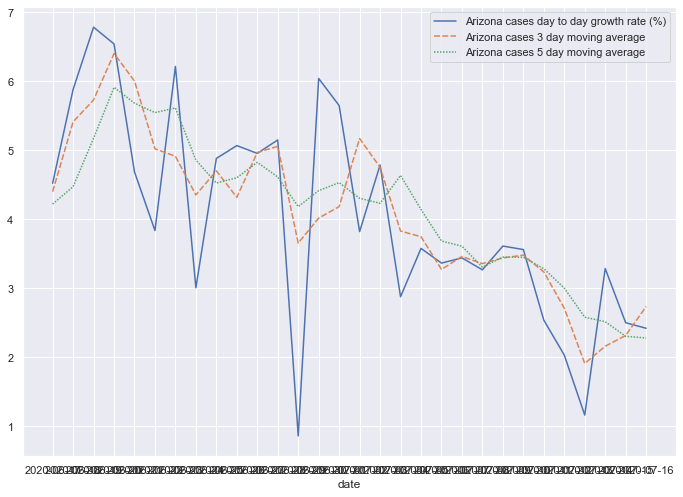

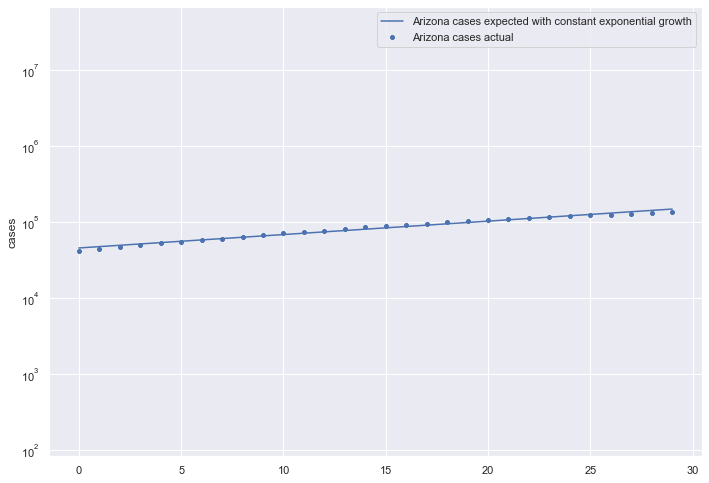

Arizona deaths exponential formula fitted with 30 points:
deaths = 1236.45 * exp(0.0232 * day)
fitted daily growth rate: 2.35 %, fitted days to doubling: 29.9
actual daily growth rate: 2.94 %, actual days to doubling: 23.6


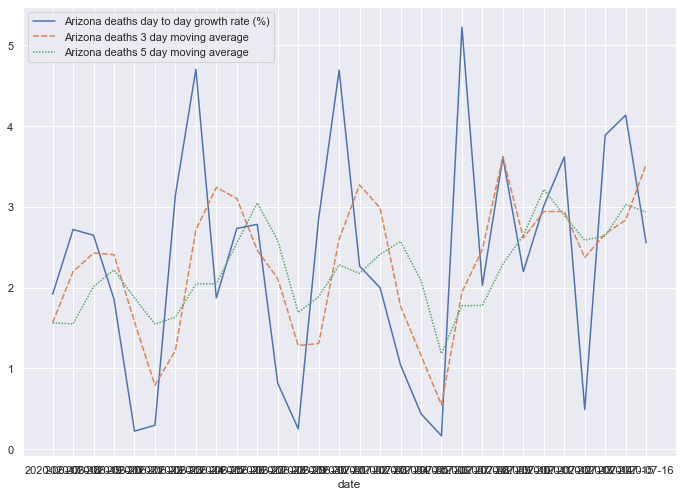

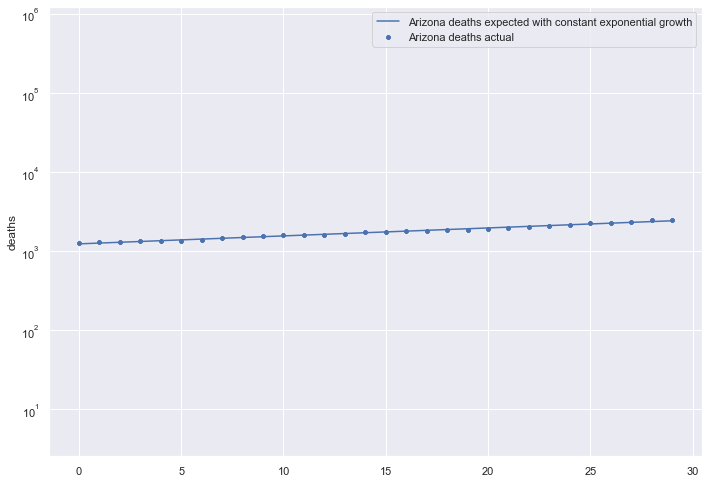

Trajectory plots for Arizona, to see when the curve starts flattening


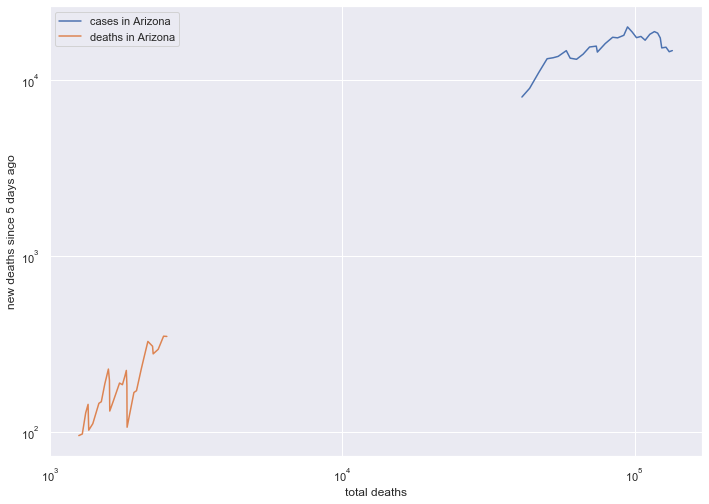


### Analysis for USA total: ###

USA total: cases exponential formula fitted with 30 points:
cases = 2135027.1 * exp(0.0175 * day)
fitted daily growth rate: 1.76 %, fitted days to doubling: 39.68
actual daily growth rate: 1.89 %, actual days to doubling: 36.6


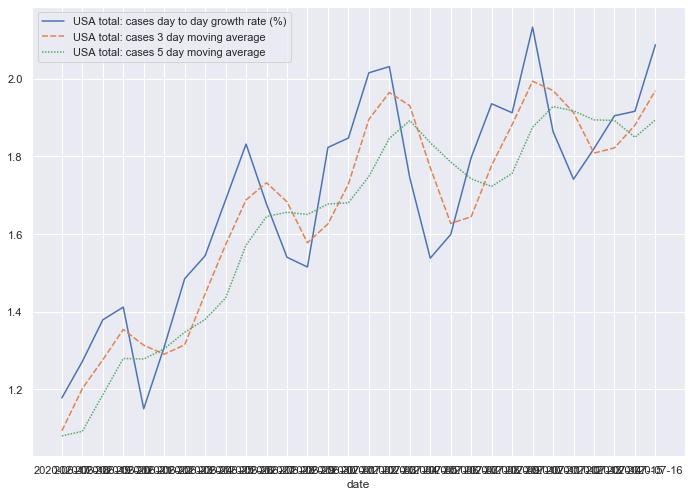

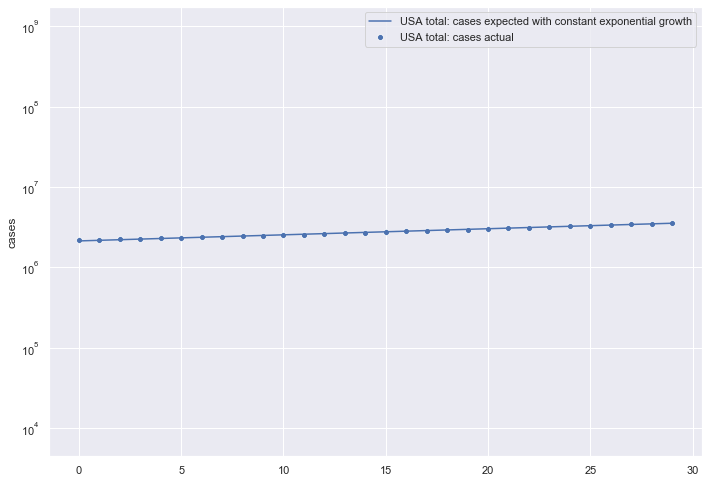

USA total: deaths exponential formula fitted with 30 points:
deaths = 117876.46 * exp(0.0055 * day)
fitted daily growth rate: 0.55 %, fitted days to doubling: 126.95
actual daily growth rate: 0.54 %, actual days to doubling: 129.12


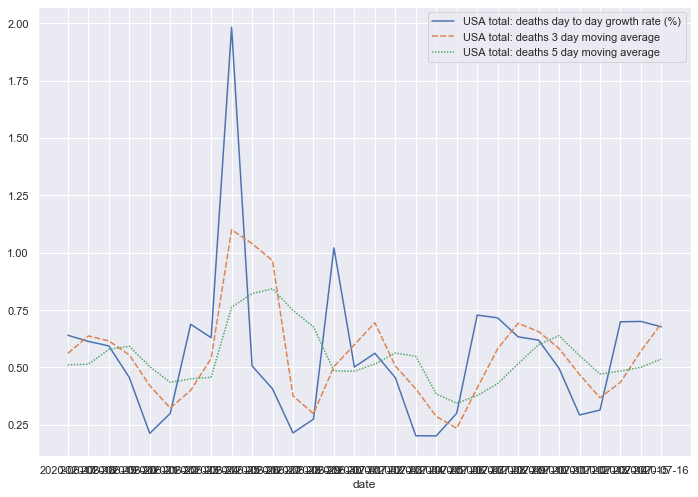

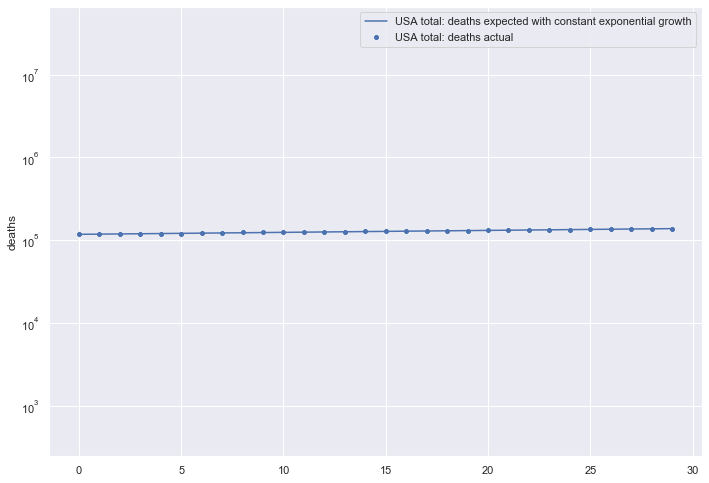

Trajectory plots for USA total:, to see when the curve starts flattening


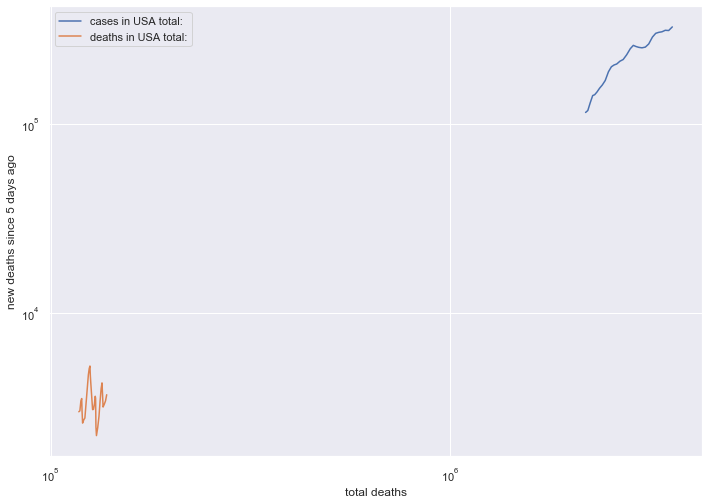

In [118]:
counties =["San Francisco", "Boulder", "Maricopa", "Denver", "Los Angeles"]
states = [ "California", "Colorado", "Arizona"]
analyse(counties=counties, states=states)